# PTI-Clima Notebooks  <img src="https://www.r-project.org/logo/Rlogo.png" alt="Description" width="60" height="40">

***

> Este cuaderno o notebook muestra las operaciones básicas para comenzar a trabajar con los conjuntos de datos de la PTI-Clima que se incluyen en el [almacén de datos](https://pti.climate.ifca.es/data). Este trabajo está licenciado bajo una [Licencia Creative Commons Atribución 4.0 Internacional](http://creativecommons.org/licenses/by/4.0).
>
> ![Licencia de Creative Commons](https://i.creativecommons.org/l/by/4.0/88x31.png)


## Primeros pasos

**M. Iturbide** (Instituto de Física de Cantabria, CSIC-Universidad de Cantabria, Santander, Spain).

**¡Bienvenidos al cuaderno "Primeros pasos" de la Plataforma Virtual de Cálculo de la PTI-Clima!**  
Esta guía está diseñada para ayudarte a sacar el máximo provecho de los numerosos recursos disponibles en el [**Almacén de Datos de la PTI-Clima**](https://pti.climate.ifca.es/data). A través de esta plataforma, podrás realizar investigaciones y **análisis climáticos de relevancia**, ya que ofrece **acceso transparente a una amplia gama de materiales y datos** subyacentes a los **servicios climáticos desarrollados en la PTI-Clima**, fomentando su **reutilización** y posibilitando la **reproducibilidad** de los productos generados.

Esta guía se divide en varias secciones. Comenzaremos describiendo el objetivo general y la motivación detrás de esta plataforma virtual, aclarando su propósito y relevancia en el ámbito de la investigación climática. A continuación, profundizaremos en la Descripción del material disponible, brindándote una visión de los diversos conjuntos de datos y recursos a tu disposición para el análisis climático. Finalmente, en la sección sobre Carga de datos y operaciones básicas de datos, **te guiaremos a través de los pasos fundamentales para comenzar a trabajar de manera efectiva con datos climáticos**. Para esto último, utilizaremos el **framework *climate4R***, un conjunto de librerías de R para la carga, post-procesamiento y análisis de datos climáticos. 

<img src="https://raw.githubusercontent.com/SantanderMetGroup/climate4R/refs/heads/devel/man/figures/climate4R_logo.svg" alt="Description" width="60" height="40">

***climate4R*** ofrece más funcionalidades de las que se ilustran en este notebook, como **funcionalidades de operaciones espaciales y temporales** o como **interpolación, subsetting o intersección espacial**. Además, brinda funcionalidades para la **corrección de sesgo y downscaling**. Consulta [Iturbide et al., 2019](https://www.sciencedirect.com/science/article/pii/S1364815218303049?via%3Dihub) y el repositorio de [github de climate4R](https://github.com/SantanderMetGroup/climate4R) para más información.


### Contenido de este cuaderno
1) Objetivo y motivación  
2) Descripción del material disponible en el datalab
3) Armonización: uso de diccionarios 
4) Carga de datos y operaciones básicas de datos
   * 4.1. La estructura del `grid` de *climate4R*
   * Gráficos iniciales de exploración de datos
   * Agregación espacial
5) Session Info

Antes de empezar, o en cualquier momento durante el cuaderno, podemos personalizar el área de visualización de gráficos de la siguiente manera:

In [1]:
library(repr)
# Change plot size 
options(repr.plot.width=8, repr.plot.height=5)

***

### 1. Objetivo y motivación

La **Plataforma Virtual de Cálculo de la PTI-Clima** tiene como finalidad **respaldar la reproducibilidad y la reutilización** de los datos que subyacen a los [servicios climáticos desarrolados en la PTI-Clima](https://pti-clima.csic.es/servicios-climaticos/). Para ello, aprovecha las tecnologías más recientes y ofrece un **entorno de investigación eficiente que agiliza el análisis de datos**. Esto se logra gracias a las tecnologías de **acceso remoto a datos** y a los **recursos computacionales con marcos de software listos para usar**. Mediante la implementación de estas nuevas tecnologías, el análisis de datos climáticos se vuelve más eficiente, y el legado de los resultados del proyecto puede ampliarse en beneficio de la sociedad.


### 2. Descripción del material disponible en la plataforma virtual

La plataforma de cálculo virtual es más que un simple recurso de computación; abarca **el acceso a datos (catálogos NcML), software y notebooks**, facilitando así la reproducibilidad de los resultados y la reutilización de los datos subyacentes.


#### Software

Esta plataforma cuenta con **software preinstalado y listo para usar** para gestionar y realizar operaciones con datos climáticos. Este software consiste en un conjunto de **paquetes de R**, conocido como el **framework `climate4R`** (Iturbide et al., 2019. DOI: [10.1016/j.envsoft.2018.09.009](https://www.sciencedirect.com/science/article/pii/S1364815218303049?via%3Dihub)), que puede seleccionarse desde el menú de kernel. Para más información, visita [el repositorio de climate4R en GitHub](https://github.com/SantanderMetGroup/climate4R).

Para usuarios de Python, también se dispone de un entorno **`python 3`**. Es importante señalar, no obstante, que en este caso el software preinstalado es más básico.

Las bibliotecas centrales de ***climate4R*** que permiten **cargar y transformar** datos (p. ej., agregaciones espaciotemporales) y **visualizarlos** son `loadeR`, `transformeR` y `visualizeR`.

In [2]:
library(loadeR)
library(transformeR)
library(visualizeR)
library(climate4R.UDG)

Loading required package: rJava

Loading required package: loadeR.java

Java version 22x amd64 by N/A detected

NetCDF Java Library v4.6.0-SNAPSHOT (23 Apr 2015) loaded and ready

Loading required package: climate4R.UDG

climate4R.UDG version 0.2.6 (2023-06-26) is loaded

Please use 'citation("climate4R.UDG")' to cite this package.

loadeR version 1.8.1 (2023-06-22) is loaded


Get the latest stable version (1.8.2) using <devtools::install_github(c('SantanderMetGroup/climate4R.UDG','SantanderMetGroup/loadeR'))>

Please use 'citation("loadeR")' to cite this package.




    _______   ____  ___________________  __  ________ 
   / ___/ /  / /  |/  / __  /_  __/ __/ / / / / __  / 
  / /  / /  / / /|_/ / /_/ / / / / __/ / /_/ / /_/_/  
 / /__/ /__/ / /  / / __  / / / / /__ /___  / / \ \ 
 \___/____/_/_/  /_/_/ /_/ /_/  \___/    /_/\/   \_\ 
 
      github.com/SantanderMetGroup/climate4R



transformeR version 2.2.2 (2023-10-26) is loaded


Get the latest stable version (2.2.3) using <devtools::install_github('SantanderMetGroup/transformeR')>

Please see 'citation("transformeR")' to cite this package.

visualizeR version 1.6.4 (2023-10-26) is loaded

Please see 'citation("visualizeR")' to cite this package.



Sin embargo, el software incluye todo el framework *climate4R* y otras bibliotecas útiles. Por ejemplo, incluye la potente biblioteca de gráficos `lattice` o la biblioteca `magrittr` para operaciones en tuberías (a través de `%>%`).

In [3]:
library(lattice)
library(magrittr)

#### Datos

El inventario (`data_inventory.csv`) cataloga la lista de archivos del [**Almacén de datos de la PTI-Clima**](https://pti.climate.ifca.es/data).

Simplemente necesitamos leer este archivo con la función `read.csv` para obtener el `data.frame` con esta información.

In [4]:
df <- read.csv("data_inventory.csv")

Podremos ver las primeras filas del `data.frame` resultande con la función `head`.

In [5]:
head(df)

,dataset,type,access,source,provider,experiment,frequency,endpoint,dictionary
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,AEMET-5KM-regular_Iberia_day,observations,opendap,AEMET-5KM-regular,,,day,https://data.meteo.unican.es/thredds/dodsC/PTI-clima/observations/AEMET-5KM-regular_Iberia_day.ncml,../../Harmonization_dictionaries/AEMET-5KM-regular.dic
2,CHELSA-W5E5v1.0_Canarias_day,observations,opendap,CHELSA-W5E5v1.0,,,day,https://data.meteo.unican.es/thredds/dodsC/PTI-clima/observations/CHELSA-W5E5v1.0_Canarias_day.ncml,../../Harmonization_dictionaries/CHELSA-W5E5v1.0.dic
3,CHELSA-W5E5v1.0_Iberia_day,observations,opendap,CHELSA-W5E5v1.0,,,day,https://data.meteo.unican.es/thredds/dodsC/PTI-clima/observations/CHELSA-W5E5v1.0_Iberia_day.ncml,../../Harmonization_dictionaries/CHELSA-W5E5v1.0.dic
4,PTI-grid-v0_Canarias_day,observations,opendap,PTI-grid-v0,,,day,https://data.meteo.unican.es/thredds/dodsC/PTI-clima/observations/PTI-grid-v0_Canarias_day.ncml,../../Harmonization_dictionaries/PTI-grid-v0.dic
5,PTI-grid-v0_Iberia_day,observations,opendap,PTI-grid-v0,,,day,https://data.meteo.unican.es/thredds/dodsC/PTI-clima/observations/PTI-grid-v0_Iberia_day.ncml,../../Harmonization_dictionaries/PTI-grid-v0.dic
6,CORDEXbc_output_EUR-11_CLMcom-ETH_ICHEC-EC-EARTH_historical_CLMcom-ETH-COSMO-crCLIM-v1-1_v1_day,projections,opendap,CORDEX,ESGF,historical,day,https://data.meteo.unican.es/thredds/dodsC/PTI-clima/projections/spain/CORDEXbc_output_EUR-11_CLMcom-ETH_ICHEC-EC-EARTH_historical_CLMcom-ETH-COSMO-crCLIM-v1-1_v1_day.ncml,../../Harmonization_dictionaries/CORDEXbc.dic


Se observan diferentes columnas o campos que describen los datos:

* `dataset` se refiere al nombre que se le da a cada instancia de datos en el almacén.
* `type` se refiere al tipo de los conjuntos de datos, ya sea "observaciones" (observations), "reanalisis" (reanalysis) o proyecciones (projections).
* `source` se refiere al conjuntos de datos de origen (p. ej., CORDEX-EUR, CMIP5, CMIP6, etc.).  
* `provider` se refiere a la entidad distribuidora de donde se obtuvieron los datos originales.  
* `access` se refiere al modo de acceso, ya sea local (netcdf) o remoto (opendap).
* `experiment` se refiere al escenario (p. ej., historical, rcp26, ssp126, rcp85, etc.).
* `frequency` se refiere a la escala temporal de los datos.
* `endpoint` se refiere a la ruta del archivo de datos. Esta ruta es la que se utilizará para cargar los datos más adelante.
* `dictionary` se refiere a la ruta del diccionario que permite la carga de datos en unidades estándar (ver sección siguiente).

Podemos **aplicar fácilmente filtros** para obtener el archivo deseado. Por ejemplo, podemos consultar todos los **datasets de observaciones** disponibles,

In [6]:
subset(df, type == "observations")

,dataset,type,access,source,provider,experiment,frequency,endpoint,dictionary
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,AEMET-5KM-regular_Iberia_day,observations,opendap,AEMET-5KM-regular,,,day,https://data.meteo.unican.es/thredds/dodsC/PTI-clima/observations/AEMET-5KM-regular_Iberia_day.ncml,../../Harmonization_dictionaries/AEMET-5KM-regular.dic
2,CHELSA-W5E5v1.0_Canarias_day,observations,opendap,CHELSA-W5E5v1.0,,,day,https://data.meteo.unican.es/thredds/dodsC/PTI-clima/observations/CHELSA-W5E5v1.0_Canarias_day.ncml,../../Harmonization_dictionaries/CHELSA-W5E5v1.0.dic
3,CHELSA-W5E5v1.0_Iberia_day,observations,opendap,CHELSA-W5E5v1.0,,,day,https://data.meteo.unican.es/thredds/dodsC/PTI-clima/observations/CHELSA-W5E5v1.0_Iberia_day.ncml,../../Harmonization_dictionaries/CHELSA-W5E5v1.0.dic
4,PTI-grid-v0_Canarias_day,observations,opendap,PTI-grid-v0,,,day,https://data.meteo.unican.es/thredds/dodsC/PTI-clima/observations/PTI-grid-v0_Canarias_day.ncml,../../Harmonization_dictionaries/PTI-grid-v0.dic
5,PTI-grid-v0_Iberia_day,observations,opendap,PTI-grid-v0,,,day,https://data.meteo.unican.es/thredds/dodsC/PTI-clima/observations/PTI-grid-v0_Iberia_day.ncml,../../Harmonization_dictionaries/PTI-grid-v0.dic


o los **reanalysis** disponibles,

In [7]:
subset(df, type == "reanalysis")

,dataset,type,access,source,provider,experiment,frequency,endpoint,dictionary
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
117,ERA5-Land_Canarias_day,reanalysis,opendap,ERA5-Land,ecmwf,,day,https://data.meteo.unican.es/thredds/dodsC/PTI-clima/reanalysis/ERA5-Land_Canarias_day.ncml,../../Harmonization_dictionaries/ERA5-Land.dic
118,ERA5-Land_Iberia_day,reanalysis,opendap,ERA5-Land,ecmwf,,day,https://data.meteo.unican.es/thredds/dodsC/PTI-clima/reanalysis/ERA5-Land_Iberia_day.ncml,../../Harmonization_dictionaries/ERA5-Land.dic


o las **proyecciones de cambio climático** para un experimento concreto (a continuación se muestran las primeras filas con la función `head`), etc.

In [8]:
subset(df, type == "projections" & experiment == "historical") %>% head

,dataset,type,access,source,provider,experiment,frequency,endpoint,dictionary
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
6,CORDEXbc_output_EUR-11_CLMcom-ETH_ICHEC-EC-EARTH_historical_CLMcom-ETH-COSMO-crCLIM-v1-1_v1_day,projections,opendap,CORDEX,ESGF,historical,day,https://data.meteo.unican.es/thredds/dodsC/PTI-clima/projections/spain/CORDEXbc_output_EUR-11_CLMcom-ETH_ICHEC-EC-EARTH_historical_CLMcom-ETH-COSMO-crCLIM-v1-1_v1_day.ncml,../../Harmonization_dictionaries/CORDEXbc.dic
8,CORDEXbc_output_EUR-11_CLMcom-ETH_NCC-NorESM1-M_historical_CLMcom-ETH-COSMO-crCLIM-v1-1_v1_day,projections,opendap,CORDEX,ESGF,historical,day,https://data.meteo.unican.es/thredds/dodsC/PTI-clima/projections/spain/CORDEXbc_output_EUR-11_CLMcom-ETH_NCC-NorESM1-M_historical_CLMcom-ETH-COSMO-crCLIM-v1-1_v1_day.ncml,../../Harmonization_dictionaries/CORDEXbc.dic
10,CORDEXbc_output_EUR-11_CLMcom_CNRM-CERFACS-CNRM-CM5_historical_CLMcom-CCLM4-8-17_v1_day,projections,opendap,CORDEX,ESGF,historical,day,https://data.meteo.unican.es/thredds/dodsC/PTI-clima/projections/spain/CORDEXbc_output_EUR-11_CLMcom_CNRM-CERFACS-CNRM-CM5_historical_CLMcom-CCLM4-8-17_v1_day.ncml,../../Harmonization_dictionaries/CORDEXbc.dic
13,CORDEXbc_output_EUR-11_CLMcom_ICHEC-EC-EARTH_historical_CLMcom-CCLM4-8-17_v1_day,projections,opendap,CORDEX,ESGF,historical,day,https://data.meteo.unican.es/thredds/dodsC/PTI-clima/projections/spain/CORDEXbc_output_EUR-11_CLMcom_ICHEC-EC-EARTH_historical_CLMcom-CCLM4-8-17_v1_day.ncml,../../Harmonization_dictionaries/CORDEXbc.dic
16,CORDEXbc_output_EUR-11_CLMcom_MOHC-HadGEM2-ES_historical_CLMcom-CCLM4-8-17_v1_day,projections,opendap,CORDEX,ESGF,historical,day,https://data.meteo.unican.es/thredds/dodsC/PTI-clima/projections/spain/CORDEXbc_output_EUR-11_CLMcom_MOHC-HadGEM2-ES_historical_CLMcom-CCLM4-8-17_v1_day.ncml,../../Harmonization_dictionaries/CORDEXbc.dic
19,CORDEXbc_output_EUR-11_CLMcom_MPI-M-MPI-ESM-LR_historical_CLMcom-CCLM4-8-17_v1_day,projections,opendap,CORDEX,ESGF,historical,day,https://data.meteo.unican.es/thredds/dodsC/PTI-clima/projections/spain/CORDEXbc_output_EUR-11_CLMcom_MPI-M-MPI-ESM-LR_historical_CLMcom-CCLM4-8-17_v1_day.ncml,../../Harmonization_dictionaries/CORDEXbc.dic


En este notebook hemos optado por mostrar un ejemplo sencillo que trabaje con el reanalysis de `ERA5-Land` sobre Iberia. Para ello, seleccionaremos el dataset `ERA5-Land_Iberia_day`, y extraeremos la ruta del archivo de datos deseado correspondiente o `endpoint`.

In [9]:
dataset <- subset(df, dataset == "ERA5-Land_Iberia_day")
endpoint <- dataset[["endpoint"]]

Una vez que tenemos el `endpoint`, podemos mostrar fácilmente las características de los datos que contiene. Para hacerlo, empleamos la función `dataInventory` del paquete `loadeR`.

In [10]:
di <- dataInventory(endpoint)

[2025-01-17 10:01:54.898424] Doing inventory ...

[2025-01-17 10:01:55.04272] Opening dataset...

[2025-01-17 10:01:56.914752] The dataset was successfuly opened

[2025-01-17 10:01:57.852722] Retrieving info for 'd2m' (7 vars remaining)

[2025-01-17 10:01:57.970273] Retrieving info for 'sfcwind' (6 vars remaining)

[2025-01-17 10:01:58.037124] Retrieving info for 'sp' (5 vars remaining)

[2025-01-17 10:01:58.147932] Retrieving info for 'ssrd' (4 vars remaining)

[2025-01-17 10:01:58.227842] Retrieving info for 't2m' (3 vars remaining)

[2025-01-17 10:01:58.307361] Retrieving info for 't2mn' (2 vars remaining)

[2025-01-17 10:01:58.377535] Retrieving info for 't2mx' (1 vars remaining)

[2025-01-17 10:01:58.442923] Retrieving info for 'tp' (0 vars remaining)

[2025-01-17 10:01:58.515449] Done.



Podemos echar un primer vistazo a la información disponible con `str`.

In [11]:
str(di)

List of 8
 $ d2m    :List of 7
  ..$ Description: chr "2 metre dewpoint temperature"
  ..$ DataType   : chr "float"
  ..$ Shape      : int [1:3] 26632 101 161
  ..$ Units      : chr "K"
  ..$ DataSizeMb : num 1732
  ..$ Version    : logi NA
  ..$ Dimensions :List of 3
  .. ..$ time     :List of 4
  .. .. ..$ Type      : chr "Time"
  .. .. ..$ TimeStep  : chr "1.0 days"
  .. .. ..$ Units     : chr "days since 1950-02-01 00:00:00"
  .. .. ..$ Date_range: chr "1950-02-01T00:00:00Z - 2022-12-31T00:00:00Z"
  .. ..$ latitude :List of 5
  .. .. ..$ Type       : chr "Lat"
  .. .. ..$ Units      : chr "degrees_north"
  .. .. ..$ Values     : num [1:101] 44 43.9 43.8 43.7 43.6 ...
  .. .. ..$ Shape      : int 101
  .. .. ..$ Coordinates: chr "latitude"
  .. ..$ longitude:List of 5
  .. .. ..$ Type       : chr "Lon"
  .. .. ..$ Units      : chr "degrees_east"
  .. .. ..$ Values     : num [1:161] -10 -9.9 -9.8 -9.7 -9.6 ...
  .. .. ..$ Shape      : int 161
  .. .. ..$ Coordinates: chr "longitude"


Vemos que hay varias variables disponibles: d2m, sfcwind, sp, ssrd, t2m, t2mn, t2mx, tp. Para cada una de ellas se detalla información adicional, como las unidades,el periodo temporal que cubren, las coordenadas etc. 

### 3. Armonización: uso de diccionarios

Diferentes datasets pueden tener diferentes unidades y nombres de variables. Por ello, `climater4R` implementa el uso de **diccionarios** que permiten cargar los datos de manera armonizada, según el estándar que se establece para este framework en concreto. Este estándar se puede consultar con la función `C4R.vocabulary`.

In [12]:
C4R.vocabulary()

identifier,standard_name,units
<chr>,<chr>,<chr>
hurs,2-meter relative humidity,%
hursmax,maximum 2-meter relative humidity,%
hursmin,minimum 2-meter relative humidity,%
huss,2-meter specific humidity,kg.kg-1
hussmax,maximum 2-meter specific humidity,kg.kg-1
hussmin,minimum 2-meter specific humidity,kg.kg-1
lm,land binary mask,1
orog,surface altitude,m
ps,air pressure at surface level,Pa


Si queremos adherirnos a este estándar debemos modificar los nombres y unidades del dataset de `ERA5-Land_Iberia_day` cuando cargemos los datos. Si consultamos el `dataInventory` que hemos realizado antes, vemos que, por ejemplo, la temperatura máxima superficial se denomina `t2mx` en ERA5-Land y que las unidades están en `Kelvin`. Sin embargo, el estándar para esta variable es el nombre `tasmax` y las unidades `ºC`. 

Esta conversión la podemos realizar después de cargar los datos con funciones específicas (ver las funcionalidades del paquete [***convertR***](https://github.com/SantanderMetGroup/convertR)). Sin embargo, Los **diccionarios permiten la conversión a nombres y unidades estándar** en el mismo momento de la carga y de forma transparente (ver [Iturbide et al. 2019](https://www.sciencedirect.com/science/article/pii/S1364815218303049)). Esto supone una ventaja importante cuando cargamos varios datasets (ver e.g. el notebook `intercomp_rejillas_obs_R.ipynb`), ya que nos asegura que una vez cargados los datos todos comparten las mismas unidades. Además, los diccionarios permiten utilizar el nombre estándar de la variable en la función de carga de los datos (ver siguiente sección), independientemente del nombre que figure en el dataset. Esto permite automatizar las cargas sin necesidad de comprobar y utilizar el nombre que recibe la variable de interés en un dataset particular.

Estos diccionarios están disponibles y se enlazan en el mismo `data_inventory.csv` que inventaria los datasets disponibles, de manera que el usuario no necesita preocuparse de este paso.

In [13]:
dictionary <- dataset$dictionary %>% print

[1] "../../Harmonization_dictionaries/ERA5-Land.dic"


Dado que estos diccionarios están preparados para trabajar con los notebooks del directorio "notebooks/R", las rutas, en la actualidad, son relativas a este directorio. Podemos modificar esta ruta para este notebook concreto fácilmente de la siguiente manera:

In [14]:
dictionary <- gsub("../../", "", dictionary) %>% print

[1] "Harmonization_dictionaries/ERA5-Land.dic"


### 4. Carga de datos y operaciones básicas


La carga de datos se realiza mediante la función `loadGridData` especificando, como fuente de datos, la ruta de un archivo NetCDF o de un catálogo NcML. En nuestro caso, esa ruta es precisamente lo que encapsula el objeto `endpoint` que hemos definido anteriormente.

También es necesario especificar el parámetro `var`, que en este ejemplo se establece como `tasmax` (temperatura superficial maxima). Ten en cuenta que `loadGridData` permite establecer parámetros adicionales. Por ejemplo, podríamos utilizar los parámetros `lonLim` y `latLim` para cargar únicamente el subconjunto de datos correspondiente a una región más pequeña. Si no se emplean estos parámetros se carga el dominio completo (como en este caso). Otro parámetro útil es `season`, para cargar datos de meses específicos (en este ejemplo, JJA para el verano boreal). En el parámetro `years`, especificamos el periodo deseado (en este caso, 1991-2020). Ejecuta `help(loadGridData)` para consultar otros parámetros disponibles.  La carga de datos puede tardar segundos o minutos dependiendo de la cantidad de datos que corresponda a la petición que hagamos.

Por último, para obtener los datos armonizados (ver sección anterior), utilizaremos el diccionario correspondiente a este dataset (objeto `dictionary`).

In [15]:
tasmax.jja <- loadGridData(dataset = endpoint,
             var = "tasmax",
             season = 6:8,
             years = 1991:2020,
             dictionary = dictionary)

[2025-01-17 10:01:58.844379] Defining harmonization parameters for variable "tasmax"

[2025-01-17 10:01:58.935531] Opening dataset...

[2025-01-17 10:01:59.981438] The dataset was successfuly opened

[2025-01-17 10:01:59.987909] Defining geo-location parameters

[2025-01-17 10:02:00.089129] Defining time selection parameters

[2025-01-17 10:02:00.314598] Retrieving data subset ...

[2025-01-17 10:02:30.653049] Done



#### 4.1. La estructura del `grid` de *climate4R*

El objeto resultante (aquí llamado `tasmax.jja`) es un *grid* de *climate4R*, que consiste en un objeto de tipo `list` con los siguientes slots: `Variable`, `Data`, `xyCoordinates`, `Dates` (y `Members` cuando se tratan de datos varios modelos, como ocurre con las proyecciones climáticas). Podemos comprobar la estructura, nombre de variable, unidades, etc. con la función `str`.

In [16]:
str(tasmax.jja)

List of 4
 $ Variable:List of 2
  ..$ varName: chr "tasmax"
  ..$ level  : NULL
  ..- attr(*, "use_dictionary")= logi TRUE
  ..- attr(*, "description")= chr "daily maximum temperature"
  ..- attr(*, "units")= chr "degC"
  ..- attr(*, "longname")= chr "maximum 2-m air temperature"
  ..- attr(*, "daily_agg_cellfun")= chr "none"
  ..- attr(*, "monthly_agg_cellfun")= chr "none"
  ..- attr(*, "verification_time")= chr "none"
 $ Data    : num [1:2760, 1:101, 1:161] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ...
  ..- attr(*, "dimensions")= chr [1:3] "time" "lat" "lon"
 $ xyCoords:List of 2
  ..$ x: num [1:161] -10 -9.9 -9.8 -9.7 -9.6 ...
  ..$ y: num [1:101] 34 34.1 34.2 34.3 34.4 ...
  ..- attr(*, "projection")= chr "LatLonProjection"
  ..- attr(*, "resX")= num 0.1
  ..- attr(*, "resY")= num 0.1
 $ Dates   :List of 2
  ..$ start: chr [1:2760] "1991-06-01 00:00:00 GMT" "1991-06-02 00:00:00 GMT" "1991-06-03 00:00:00 GMT" "1991-06-04 00:00:00 GMT" ...
  ..$ end  : chr [1:2760] "1991-06-01 00:00:0

Por lo tanto, la información se puede extraer utilizando `$`. Por ejemplo, el array de datos se puede obtener ejecutando `tasmax.jja$Data`. Aquí también aplicamos `str` para mostrar la estructura del array de datos.

In [17]:
data.array <- tasmax.jja$Data %>% str

 num [1:2760, 1:101, 1:161] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ...
 - attr(*, "dimensions")= chr [1:3] "time" "lat" "lon"


Sin embargo, **dado que las funciones de *climate4R* trabajan de manera transparente con la estructura `grid`, no es necesario extraer ningún componente de la lista para realizar distintas operaciones de transformación y visualización.**

#### 4.2. Gráficos iniciales de exploración de datos

Antes de continuar, podemos examinar los datos, por ejemplo, representando mapas. Para ello, primero calculamos la climatología con la función `climatology` del paquete `transformeR`. Esta función agrega la dimensión temporal de los datos utilizando la media como función por defecto, sin embargo, podríamos utilizar cualquier otra función a través del parámetro `clim.fun` (p.ej. `climatology(tasmax.jja, clim.fun = list("max", na.rm = TRUE)`). Posteriormente, utilizamos la función `spatialPlot` del paquete `visualizeR` (ejecuta `help(spatialPlot)` para consultar diferentes parámetros de representación gráfica).

[2025-01-17 10:02:31.294925] - Computing climatology...

[2025-01-17 10:02:32.695902] - Done.



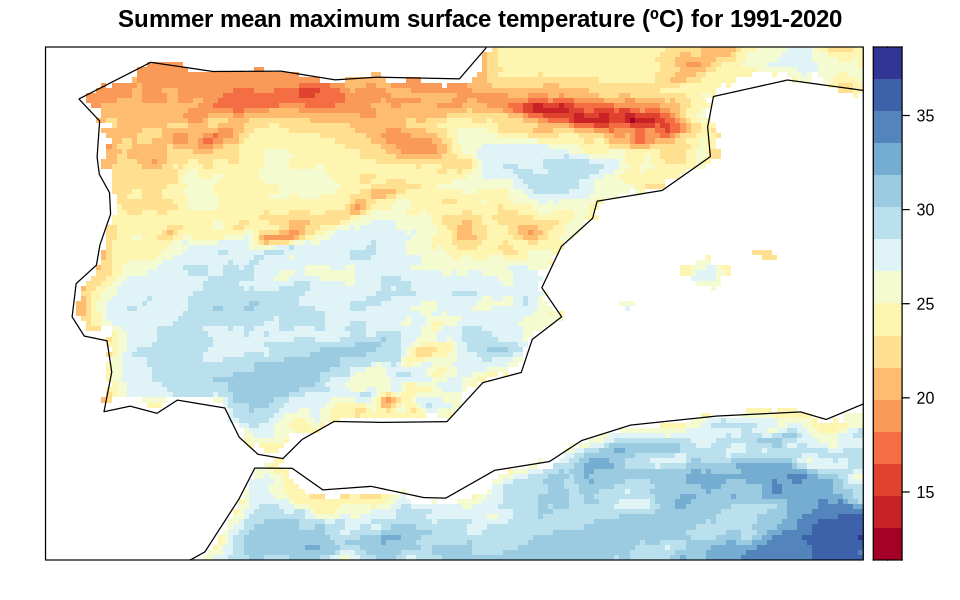

In [18]:
tasmax.jja.c <- climatology(tasmax.jja) 
spatialPlot(tasmax.jja.c, 
            backdrop.theme = "coastline", 
            col.theme = "OrRdBn",
            main = "Summer mean maximum surface temperature (ºC) for 1991-2020")

También podríamos mostrar la serie temporal con `temporalPlot` para los valores mensuales originales...

pad applied on the interval: day



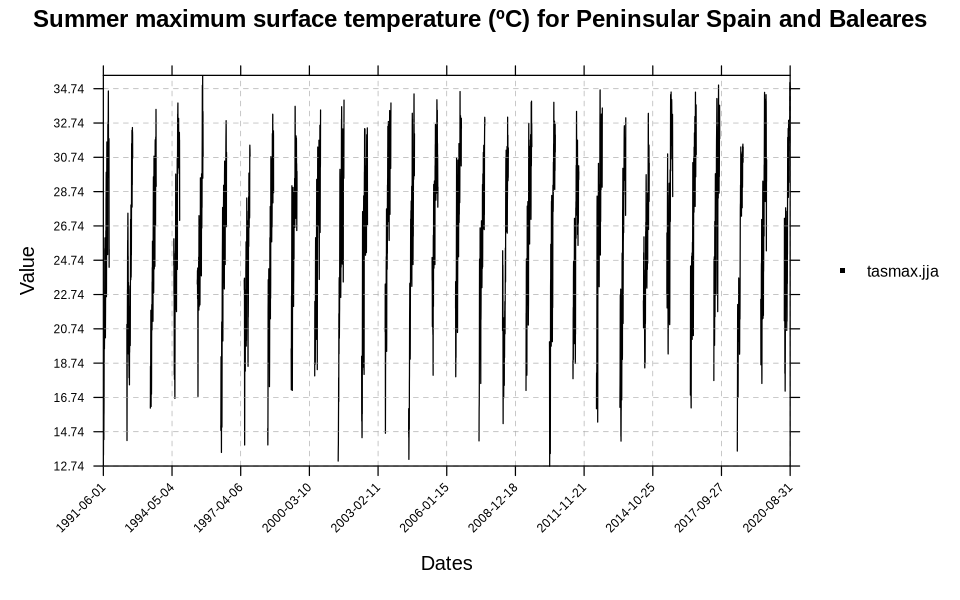

In [19]:
temporalPlot(tasmax.jja, xyplot.custom = list(main = "Summer maximum surface temperature (ºC) for Peninsular Spain and Baleares"))

...o los valores anuales agregados aplicando previamente la función `aggregateGrid` (esta vez cambiaremos el color, ejecuta `help(temporalPlot)` para realizar más personalizaciones):

[2025-01-17 10:02:40.020154] Performing annual aggregation...

[2025-01-17 10:02:45.762916] Done.

pad applied on the interval: year



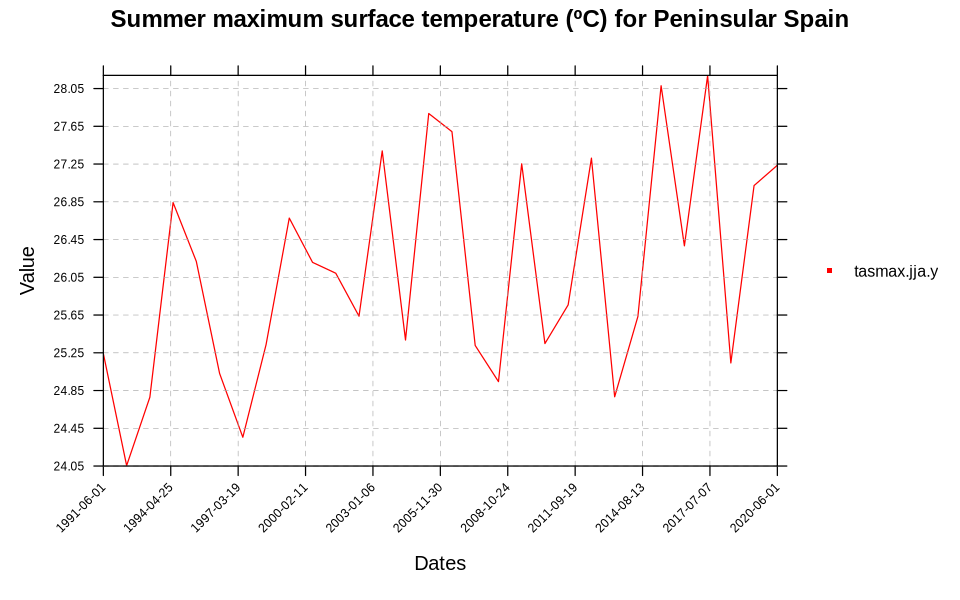

In [20]:
tasmax.jja.y <- aggregateGrid(tasmax.jja, aggr.y = list(FUN = "mean", na.rm = T))
temporalPlot(tasmax.jja.y, 
             cols = "red",
             xyplot.custom = list(main = "Summer maximum surface temperature (ºC) for Peninsular Spain"))

#### 4.3. Agregación espacial

La función que genera la figura de series temporales que hemos utilizado anteriormente realiza automáticamente la agregación espacial de los datos, utilizando la media como función de agregación por defecto y **ponderando los valores según la latitud**. Sin embargo, podemos controlar esta operación utilizando el parámetro `aggr.spatial`, tanto en la función `temporalPlot`, como en la función `aggregateGrid` si queremos generar el objeto agregado. En el siguiente ejemplo, calculamos la máxima espacial:

In [21]:
tasmax.jja.regional.max <- aggregateGrid(tasmax.jja.y, aggr.spatial = list(FUN = "max", na.rm = TRUE))

Spatial weighting skipped: It only applies to 'mean' aggregation function

[2025-01-17 10:02:45.96491] - Aggregating spatially...

[2025-01-17 10:02:45.974745] - Done.



También podemos crear las series temporales del objeto previamente agregado:

pad applied on the interval: year



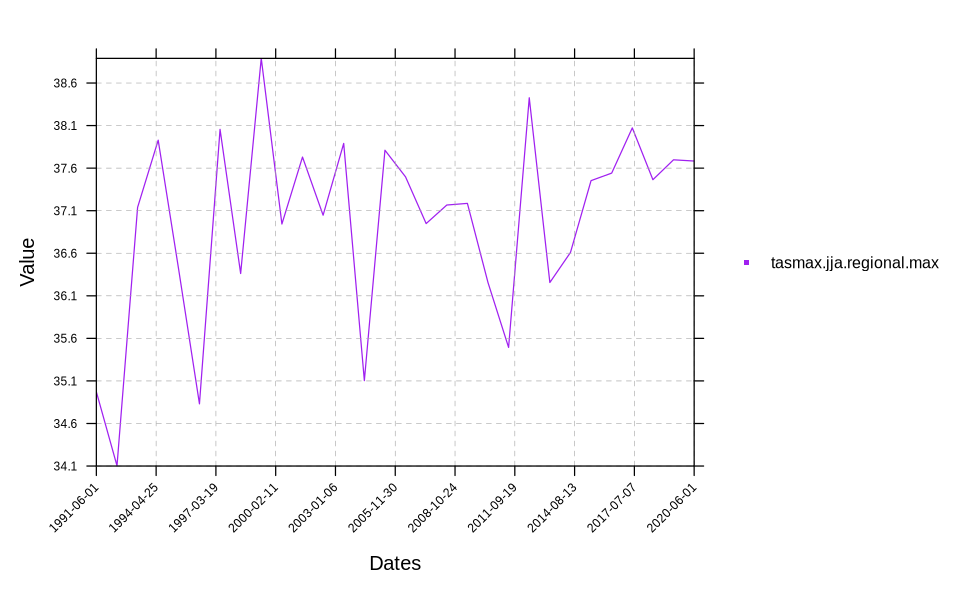

In [22]:
temporalPlot(tasmax.jja.regional.max, cols = "purple")

El **framework *climate4R*** ofrece muchas otras **funcionalidades de operaciones espaciales y temporales**, como **interpolación, subsetting o intersección espacial**. Además, brinda funcionalidades para la **corrección de sesgo y downscaling**. Consulta [Iturbide et al., 2019](https://www.sciencedirect.com/science/article/pii/S1364815218303049?via%3Dihub) y el repositorio de [github de climate4R](https://github.com/SantanderMetGroup/climate4R) para más información.


***

### 5. Session Info

In [23]:
sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 22.04.3 LTS

Matrix products: default
BLAS/LAPACK: /opt/conda/envs/climate4r/lib/libopenblasp-r0.3.27.so;  LAPACK version 3.12.0

locale:
 [1] LC_CTYPE=en_US.UTF-8          LC_NUMERIC=C                 
 [3] LC_TIME=en_US.UTF-8           LC_COLLATE=en_US.UTF-8       
 [5] LC_MONETARY=en_US.UTF-8       LC_MESSAGES=en_US.UTF-8      
 [7] LC_PAPER=en_US.UTF-8          LC_NAME=en_US.UTF-8          
 [9] LC_ADDRESS=en_US.UTF-8        LC_TELEPHONE=en_US.UTF-8     
[11] LC_MEASUREMENT=en_US.UTF-8    LC_IDENTIFICATION=en_US.UTF-8

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] magrittr_2.0.3      lattice_0.22-6      visualizeR_1.6.4   
[4] transformeR_2.2.2   loadeR_1.8.1        climate4R.UDG_0.2.6
[7] loadeR.java_1.1.1   rJava_1.0-11        repr_1.1.7         

loaded via 